In [ ]:
import numpy as np
import polars as pl
from pathlib import Path

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

# 2.1 : Few trajectories + Mean + Theory

shape: (3, 92)
┌───────────┬───────┬──────────┬────────────┬───┬────────────┬────────────┬───────────┬────────────┐
│ algorithm ┆ fact  ┆ factmode ┆ landscape  ┆ … ┆ xt_over_t  ┆ G          ┆ bound_low ┆ bound_high │
│ ---       ┆ ---   ┆ ---      ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---        │
│ str       ┆ bool  ┆ str      ┆ str        ┆   ┆ list[f64]  ┆ list[f64]  ┆ i64       ┆ i64        │
╞═══════════╪═══════╪══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪════════════╡
│ one_step  ┆ false ┆ none     ┆ homogeneou ┆ … ┆ [9.6356,   ┆ [0.960283, ┆ 5         ┆ 80         │
│           ┆       ┆          ┆ s          ┆   ┆ 9.37395, … ┆ 0.992055,  ┆           ┆            │
│           ┆       ┆          ┆            ┆   ┆ 9.325063]  ┆ … 0.95396… ┆           ┆            │
│ one_step  ┆ false ┆ none     ┆ homogeneou ┆ … ┆ [8.7533,   ┆ [1.15633,  ┆ 5         ┆ 80         │
│           ┆       ┆          ┆ s          ┆   ┆ 9.7551, …  ┆ 0.978713,  ┆ 

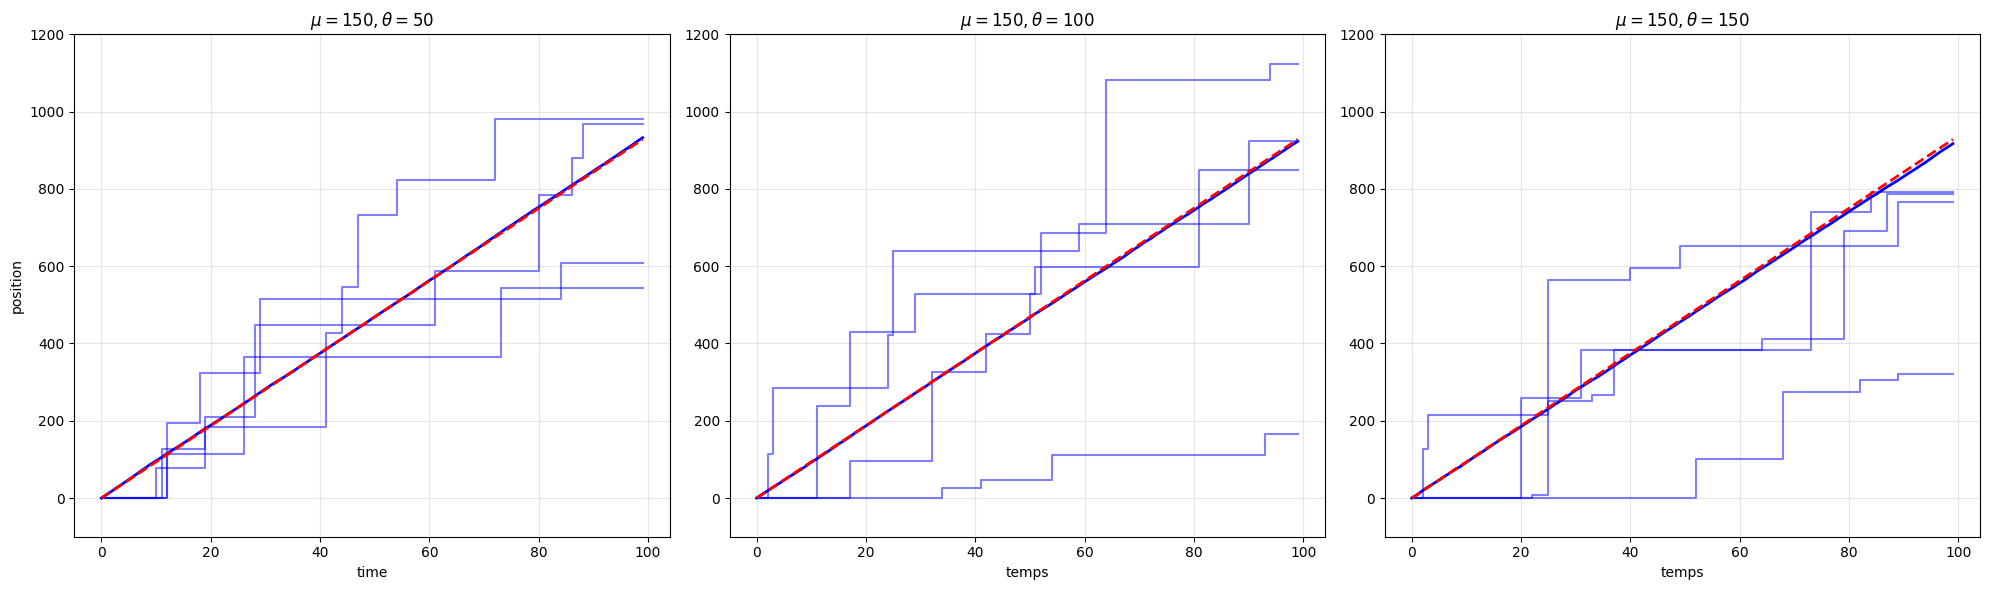

In [ ]:
# --- Load files --- #
root = Path("/home/nicolas/Documents/Workspace/nucleo/outputs/2026-02-17__PC/nucleo__fig_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=[
        "algorithm", "fact", "factmode",
        "landscape", "s", "l", "lmbda", "alphar"
        ])
)
thetas = np.unique(df_all["theta"].to_numpy())
print(df_all)


# --- Figure --- #
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

for idx, theta_val in enumerate(thetas[0:1]):
    df_theta = df_all.filter(pl.col("theta") == theta_val)
    trajs = df_theta["results"][0].to_numpy()
    mean_traj = df_theta["results_mean"][0].to_numpy()
    v_mean_th = df_theta["v_mean_th"].to_numpy()
    times = df_theta["times"][0].to_numpy()
    mu = df_theta["mu"].to_numpy()

    for i in range(0, 10):
        ax[idx].plot(trajs[i], drawstyle="steps-post", color="blue", alpha=0.50)
    ax[idx].plot(mean_traj, color="blue", ls="-", lw=2)
    ax[idx].plot(times, times*v_mean_th, color="red", ls="--", lw=2)
    ax[idx].set_ylim([-100, 1200])
    ax[idx].grid(True, alpha=0.3)
    ax[idx].set_title(rf"$\mu={mu[0]}, \theta={theta_val}$")
    ax[idx].legend()

# étiquettes
ax[0].set_ylabel("position")
ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

plt.tight_layout()
plt.show()

# 2.2 : Cuts